# Modelos de Regresión Lineal
## Modelo con datos simulados

* y = a + b *x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuida según una normal N(0, 0.8)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generación de la distribución normal
x = 1.5 + 2.5 * np.random.rand(100)

In [3]:
#Errores o residuos
res = 0 + 0.8 * np.random.randn(100)

In [4]:
#Predicción
y_pred = 5 + 1.9 * x

In [5]:
y_act = 5 + 1.9 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
#Creación del data frame 
data = pd.DataFrame(
    {
        "x": x_list,
        "y": y_act_list,
        "y_prediccion": y_pred_list
    }
)

In [8]:
data.head()

,x,y,y_prediccion
0,2.482705,10.207585,9.717140
1,3.451388,12.345395,11.557636
2,1.727126,7.440331,8.281539
3,3.212101,11.648584,11.102992
4,1.650158,8.877192,8.135300


Text(0.5,1,'Valor actual vs valor de la predicción')

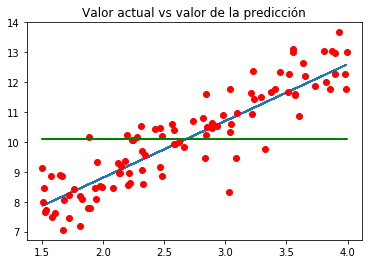

In [47]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor actual vs valor de la predicción")

In [23]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act)) ** 2
data["SSD"] = (data["y_prediccion"] - data["y"]) ** 2
data["SST"] = (data["y"] - np.mean(y_act)) **2

In [24]:
data.head()

,x,y,y_prediccion,SSR,SSD,SST
0,2.482705,10.207585,9.717140,0.141893,0.240536,0.012941
1,3.451388,12.345395,11.557636,2.142741,0.620563,5.069561
2,1.727126,7.440331,8.281539,3.284383,0.707632,7.041037
3,3.212101,11.648584,11.102992,1.018416,0.297671,2.417274
4,1.650158,8.877192,8.135300,3.835824,0.550404,1.480197


In [25]:
SSR = sum(data["SSR"])
SST = sum(data["SST"])
SSD = sum(data["SSD"])

In [27]:
SSR

202.3535604868456

In [28]:
R2 = SSR/SST

In [29]:
R2

0.7556268121693629

(array([ 7., 10., 16., 21., 26., 11.,  5.,  3.,  0.,  1.]),
 array([-1.57921288, -1.17643239, -0.77365191, -0.37087143,  0.03190906,
         0.43468954,  0.83747002,  1.24025051,  1.64303099,  2.04581147,
         2.44859196]),
 <a list of 10 Patch objects>)

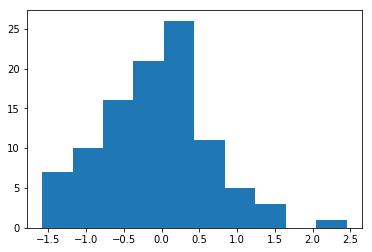

In [31]:
plt.hist((data["y_prediccion"] - data["y"]))

# Coeficientes óptimos de la regresión

## Obteniendo la recta de la regresión

* y = a + b * x
* b = sum((xi - x_m) * (y_i - y_m)) / sum((xi - x_m)^2)
* a = y_m - b * x_m

In [32]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y"])
x_mean, y_mean

(2.6486683283056722, 10.093826043518506)

In [33]:
data["beta_n"] = (data["x"] - x_mean) * (data["y"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [34]:
beta = sum(data["beta_n"]) / sum(data["beta_d"])

In [35]:
alpha = y_mean - beta * x_mean

In [36]:
alpha, beta

(4.853616144253037, 1.9784318947240864)

## Modelo líneal obtenido
* y = 4.853616144253037 +  1.9784318947240864 * x

In [37]:
data["y_model"] = alpha + beta + data["x"]

In [39]:
data.head()

,x,y,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,2.482705,10.207585,9.717140,0.141893,0.240536,0.012941,-0.018880,0.027544,9.314753
1,3.451388,12.345395,11.557636,2.142741,0.620563,5.069561,1.807377,0.644358,10.283436
2,1.727126,7.440331,8.281539,3.284383,0.707632,7.041037,2.445308,0.849240,8.559174
3,3.212101,11.648584,11.102992,1.018416,0.297671,2.417274,0.876002,0.317457,10.044149
4,1.650158,8.877192,8.135300,3.835824,0.550404,1.480197,1.214821,0.997023,8.482206


In [40]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y"])**2)
SST = sum((data["y"] - y_mean)**2)

In [41]:
SSR, SSD, SST

(93.53968322040934, 139.95141571525144, 267.7956330134709)

In [43]:
R2 = SSR / SST
R2

0.3492950283311903

Text(0.5,1,'Valor Actual vs Predicción')

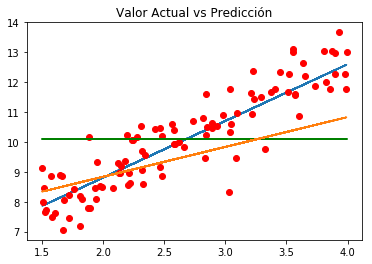

In [49]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"], data["y_prediccion"])
plt.plot(data["x"], data["y"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE) 

In [50]:
RSE = np.sqrt(SSD/len((data) - 2))
RSE

1.1830106327301182

In [51]:
np.mean(data["y"])

10.093826043518506

In [52]:
RSE / np.mean(data["y"])

0.11720140882453174